In [1]:
from scipy import misc
import glob
from skimage import io
from skimage.transform import resize
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
images = []

for image_path in glob.glob("dane/set0/*.png"):
    image = io.imread(image_path, as_gray=True)
    images.append(image)

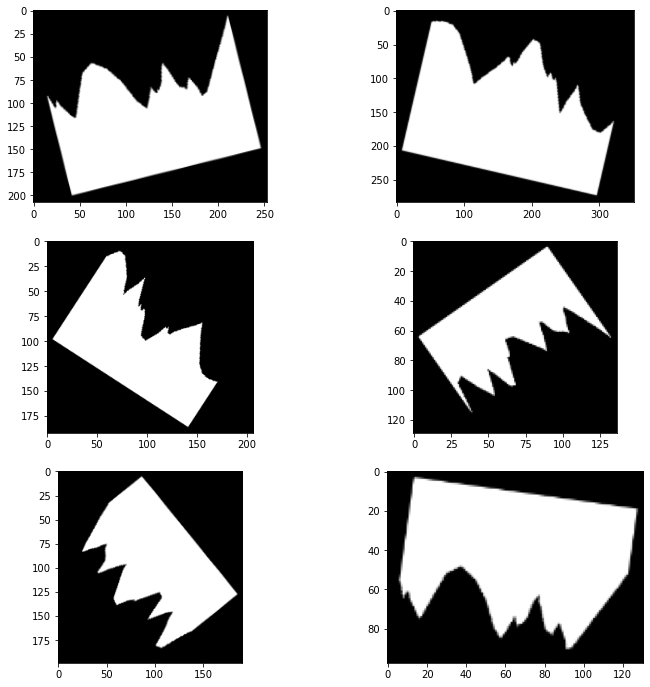

In [3]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

for index, image in enumerate(images):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 


In [4]:
numpyImages = []
for image in images:
    numpyImages.append(np.array(image))

<Figure size 432x288 with 0 Axes>

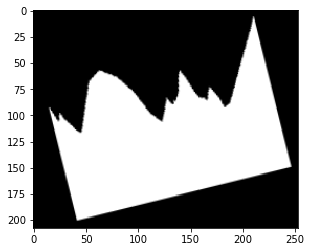

<Figure size 432x288 with 0 Axes>

In [7]:
import numpy as np
import cv2
import math
from scipy import ndimage

img_before = images[0]

plt.imshow(img_before, cmap='gray', interpolation='nearest')
plt.figure()



In [8]:
img_gray = img_before
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

plt.imshow(img_rotated, cmap='gray', interpolation='nearest')
plt.figure()

error: OpenCV(4.2.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__thiscall cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [5]:
def centerOfMass(image):
    SumX = 0
    SumY = 0
    num  = 0
    
    imageWidth, imageHeight = image.shape
    
    for i in range(imageWidth):
        for j in range(imageHeight):
            SumX += i * image[i,j]
            SumY += j * image[i,j]
            num += image[i,j]


    SumX = SumX / num;
    SumY = SumY / num;
    # The coordinate (SumX,SumY) is the center of the image mass
    return (SumX,SumY)


In [6]:
import imageio as iio
from skimage import filters
from skimage.measure import regionprops

from skimage.measure import find_contours


In [7]:
def centerOfMass2(image):
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    return center_of_mass

In [8]:
def centerOfMass3(image):
    X, Y = image.shape
    m = np.zeros((X, Y))
    for x in range(X):
        for y in range(Y):
            m[x, y] = all(image[x, y] != (0, 0, 0))
    m = m / np.sum(np.sum(m))


    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))
    
    return (cx, cy)

In [9]:
centers = []
for image in numpyImages:
    centers.append(centerOfMass3(image))

In [10]:
centers

[(123.02090545938748, 130.5975588104749),
 (158.69839988100046, 157.56146539450432),
 (102.81453037401123, 88.44697027878047),
 (54.50931899641577, 61.982974910394276),
 (93.30793272808454, 103.22890311058175),
 (41.1828231292517, 66.03287981859413)]

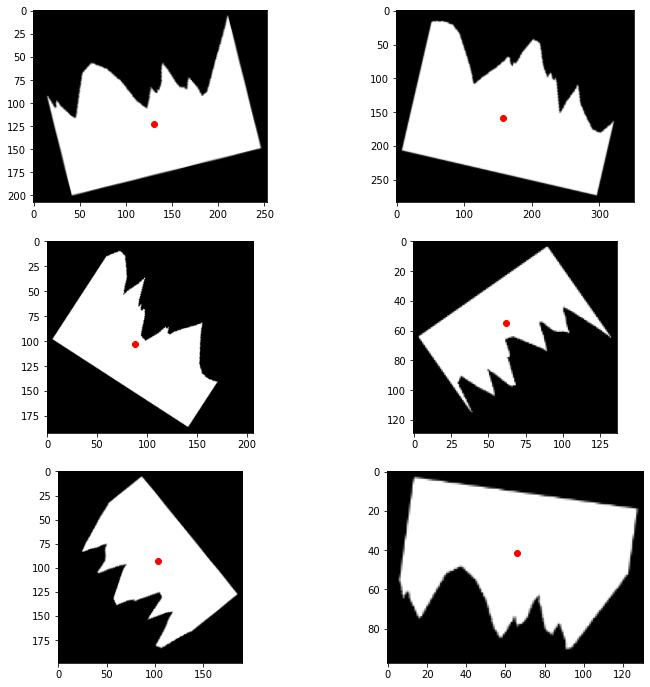

In [11]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center in zip(numpyImages, centers):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    index += 1

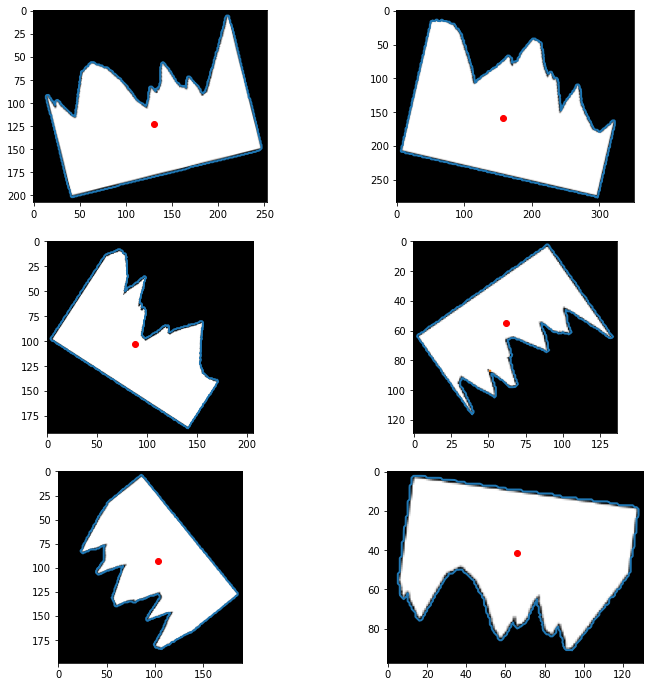

In [12]:


contours = []



for image in numpyImages:    
    contours.append(find_contours(image,0.5))
    test_contours = np.floor(contours[0])
    
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center, contour in zip(numpyImages, centers, contours):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    for n, cnt in enumerate(contour):
        axs[math.floor(index / 2),index % 2].plot(cnt[:, 1], cnt[:, 0], linewidth=2)
    index += 1  
    


In [187]:
#plan
# zrobić histogram tak jak na wykładzie
# sprawidzić wyniki
# jak nie będą wystarczajaco dobre, to obrócić i znormalizować (wielkosć) obrazki
# Sprawdzić jak działaja momenty HU
# można zrobic regresję liniową na punktach skrajnych (wierzchołki i doliny) i je porównywać


In [286]:
pixelContours = []

neighborhood = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

for image in numpyImages[:1]:
    for row, line in enumerate(image):
        for column, pixel in enumerate(line):
            if(pixel == 0):
                continue
            for x,y in neighborhood:
                try:
                    if image[row + x, column + y] == 0:
                        pixelContours.append((row, column))
                        break
                except:
                    print("err")
                
                
            

In [287]:
contursMap = np.zeros(numpyImages[0].shape)

In [201]:
for r, line in enumerate(contursMap):
    for c, _ in enumerate(line):
        if((r,c) in pixelContours):
            contursMap[r,c] = 1

<Figure size 432x288 with 0 Axes>

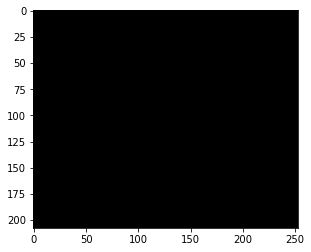

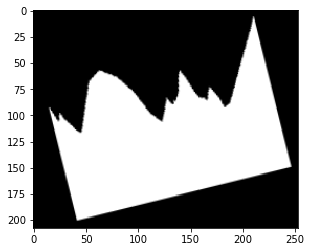

<Figure size 432x288 with 0 Axes>

In [304]:
plt.imshow(contursMap, cmap='gray', interpolation='nearest')
plt.figure()
plt.imshow(numpyImages[0], cmap='gray', interpolation='nearest')
plt.figure()

In [356]:
test_contours = np.floor(find_contours(numpyImages[0],0.5)[0])

In [357]:
tc = []

for x,y in test_contours:
    tc.append((int(x), int(y)))

In [358]:
contursMap_test = np.zeros(numpyImages[0].shape)
for r, line in enumerate(contursMap_test):
    for c, _ in enumerate(line):
        if((r,c) in tc):
            contursMap_test[r,c] = 1

<Figure size 432x288 with 0 Axes>

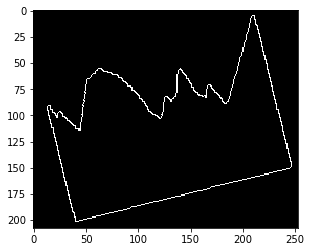

<Figure size 432x288 with 0 Axes>

In [359]:
plt.imshow(contursMap_test, cmap='gray', interpolation='nearest')
plt.figure()

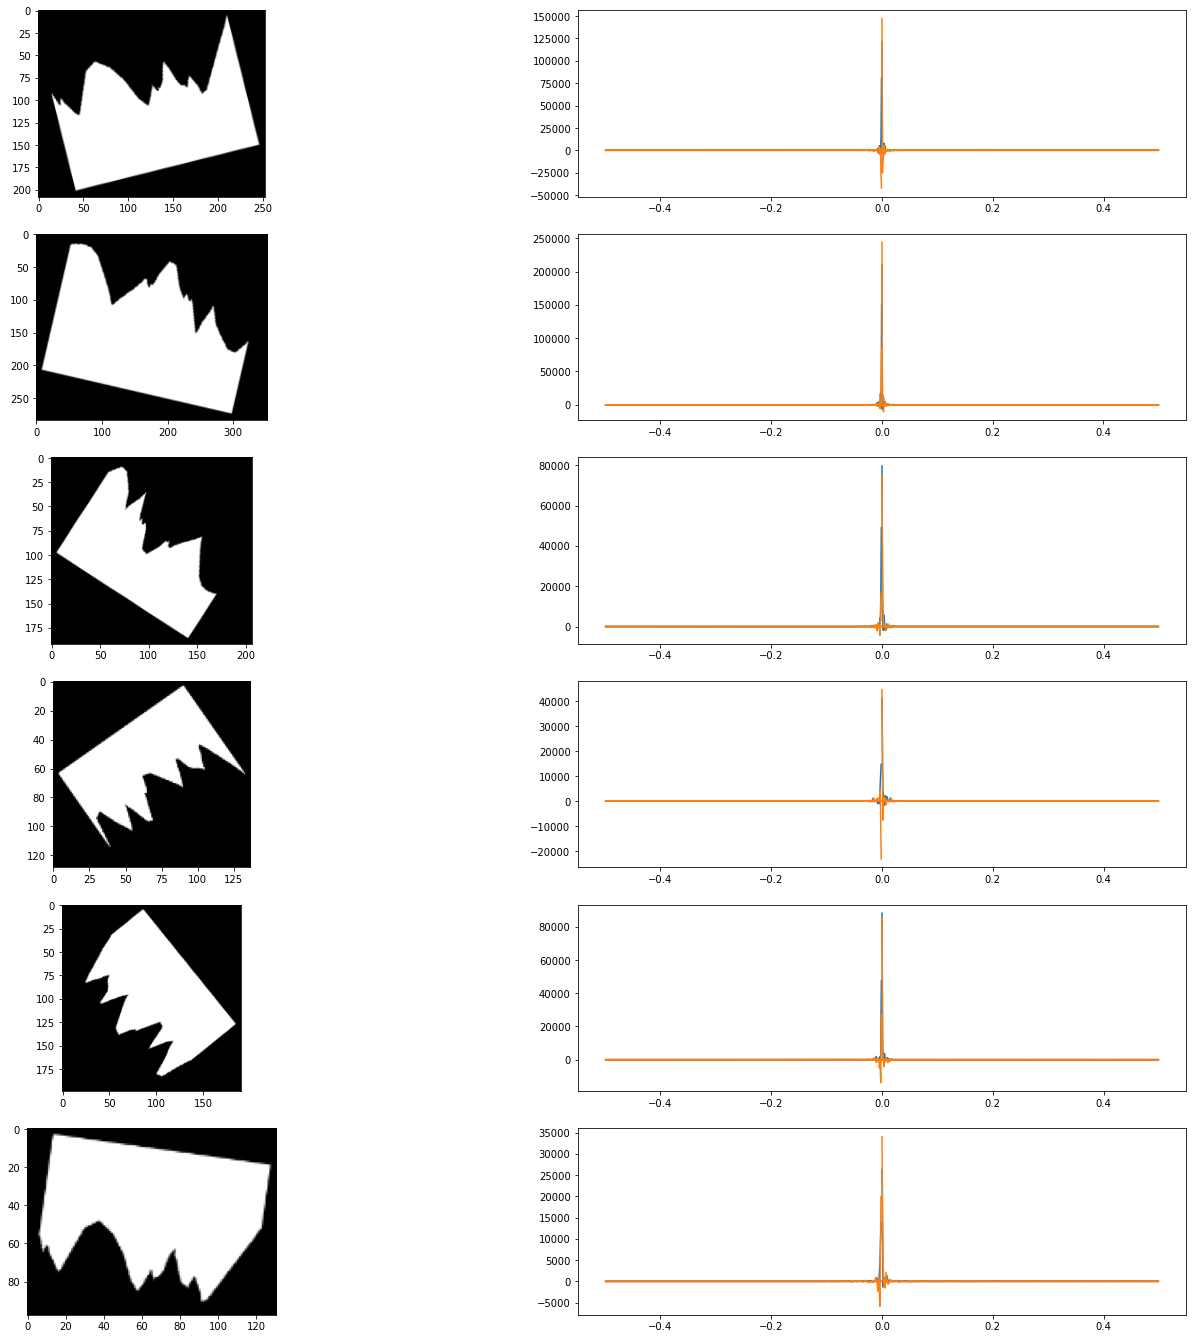

In [355]:
import pprint as pp
contours = []
contours_discrete = []
    
tc_complex = []



    
for image in numpyImages:  
    contours.append(np.floor(find_contours(image,0.5)[0]))
    
for c in contours:
    tc2 = []
    for x,y in c:
        tc2.append(x + 1j * y)
    tc2 = np.array(tc2)
    tc_complex.append(tc2)
    
fig, axs = plt.subplots(6,2, figsize=(24,24))

index = 0

for image, tcc in zip(numpyImages, tc_complex):
    
    axs[index, 0].imshow(image, cmap='gray', vmin=0, vmax=255) 
    
    sp = np.fft.fft(tcc)
    freq = np.fft.fftfreq(tcc.shape[-1])
    axs[index, 1].plot(freq, sp.real, freq, sp.imag)
    
    index += 1


In [385]:
import pprint as pp
import cv2

moms = []
    
for image in numpyImages:  
    moments = cv2.moments(image)
    huMoments = cv2.HuMoments(moments)
    moms.append(huMoments)


diffs = {}
    
for index, m in enumerate(moms):
    for index2, m2 in enumerate(moms):
        if(index != index2):
            diff = 0
            for e1, e2 in zip(m, m2):
                diff += abs(e1 - e2)
            diffs[(index, index2)] = diff
                

pp.pprint(diffs)

{(0, 1): array([9.38377696e-05]),
 (0, 2): array([3.27546479e-07]),
 (0, 3): array([3.5560457e-06]),
 (0, 4): array([0.00010853]),
 (0, 5): array([9.80164375e-05]),
 (1, 0): array([9.38377696e-05]),
 (1, 2): array([9.41652505e-05]),
 (1, 3): array([9.73938062e-05]),
 (1, 4): array([1.46892677e-05]),
 (1, 5): array([4.18141522e-06]),
 (2, 0): array([3.27546479e-07]),
 (2, 1): array([9.41652505e-05]),
 (2, 3): array([3.22860283e-06]),
 (2, 4): array([0.00010885]),
 (2, 5): array([9.8343963e-05]),
 (3, 0): array([3.5560457e-06]),
 (3, 1): array([9.73938062e-05]),
 (3, 2): array([3.22860283e-06]),
 (3, 4): array([0.00011208]),
 (3, 5): array([0.00010157]),
 (4, 0): array([0.00010853]),
 (4, 1): array([1.46892677e-05]),
 (4, 2): array([0.00010885]),
 (4, 3): array([0.00011208]),
 (4, 5): array([1.05105552e-05]),
 (5, 0): array([9.80164375e-05]),
 (5, 1): array([4.18141522e-06]),
 (5, 2): array([9.8343963e-05]),
 (5, 3): array([0.00010157]),
 (5, 4): array([1.05105552e-05])}


<Figure size 432x288 with 0 Axes>

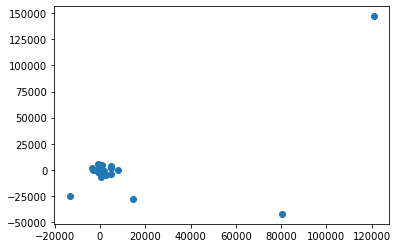

<Figure size 432x288 with 0 Axes>

In [291]:
plt.scatter(fourirer.real,fourirer.imag)
plt.figure()

<Figure size 432x288 with 0 Axes>

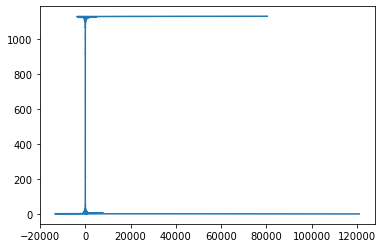

<Figure size 432x288 with 0 Axes>

In [292]:
plt.plot(fourirer.real, range(len(fourirer.real)))
plt.figure()

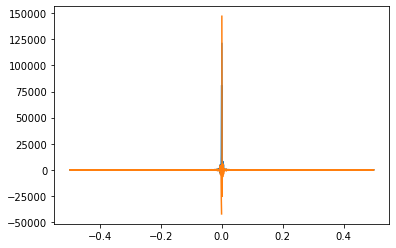

In [360]:
tc_complex = []

for x,y in tc:
    tc_complex.append(x + 1j * y)
tc_complex = np.array(tc_complex)


sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

[120995.        +147059.j         -13419.34657757 -25433.95447873j
   1005.28172092  +5021.9806946j  ...  -3728.49279469  +2175.77148439j
  14570.12327891 -27696.09076846j  80355.85593717 -42173.9368769j ]
[ 0.          0.00088574  0.00177148 ... -0.00265722 -0.00177148
 -0.00088574]


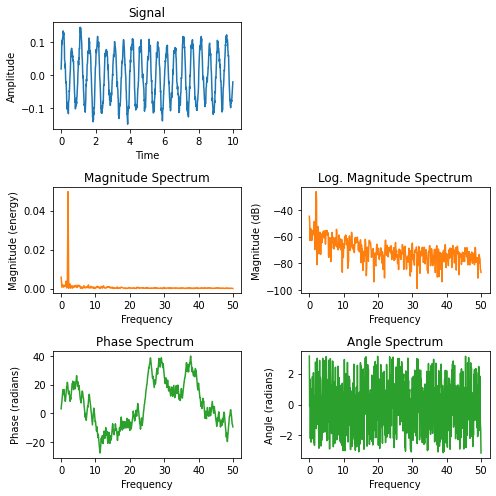

In [361]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])
print(sp)
print(freq)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

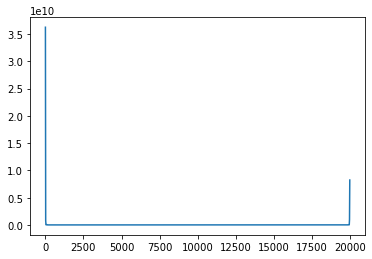

In [369]:
sampling_rate = 40000

time = np.arange(0, 10, 1/sampling_rate)

data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))


sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])



fourier_transform = np.fft.fft(tc_complex)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)

(70.0, 170.0)

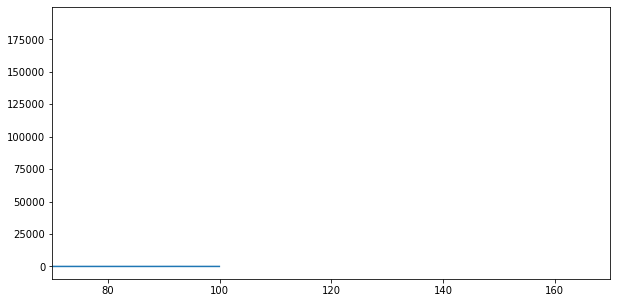

In [381]:
samples = tc_complex.shape[-1]
sample_frequency = 200000  # 200 kHz
sample_interval = 1 / sample_frequency

signal_spectrum = np.fft.fftshift(np.fft.fft(tc_complex))
freqs = np.fft.fftshift(np.fft.fftfreq(samples, d=sample_interval))
plt.figure(figsize=(10,5))
plt.plot(freqs / 1e3, np.abs(signal_spectrum))  # in kHz
plt.xlim(70, 170)